In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataPath import DATA_PATH
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [3]:
# Logging
# https://docs.python.org/3/howto/logging-cookbook.html
import logging

# create logger with 'spam_application'
logger = logging.getLogger('Logging')
logger.setLevel(logging.DEBUG)

# create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# create console handler with a higher log level
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
# add formatter to the handler
ch.setFormatter(formatter)
# add the handlers to the logger
logger.addHandler(ch)


# # create file handler which logs even debug messages
# fh = logging.FileHandler('spam.log')
# fh.setLevel(logging.ERROR)
# # add formatter to the handler
# fh.setFormatter(formatter)
# # add the handlers to the logger
# logger.addHandler(fh)


In [4]:
img = cv2.imread(DATA_PATH+"images/sample.jpg")

2020-07-31 15:19:34,806 - Logging - INFO - uint8


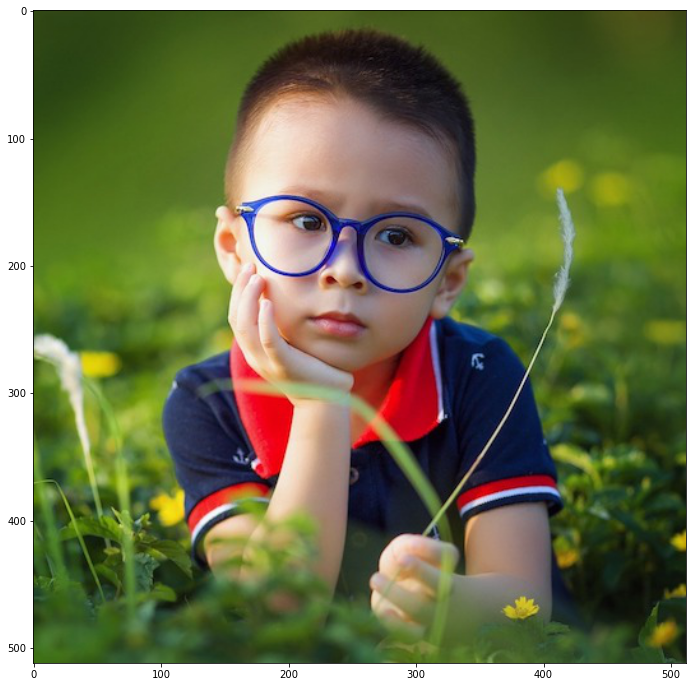

In [5]:
logger.info(img.dtype)
plt.imshow(img[:,:,::-1])
plt.show()

In [6]:
def convertBGRtoGray(image):
    ###
    ### YOUR CODE HERE
    ###
    
    B, G, R = cv2.split(image)
    logger.info(R.dtype)
    tempImage = cv2.add(0.299 * R, 0.587 * G)
#     logger.info(tempImage.dtype)
    grayImage = cv2.add(tempImage, 0.114 * B)
    grayImage = np.uint8(np.round(grayImage))
    
    return grayImage

In [7]:
gray = convertBGRtoGray(img)

2020-07-31 15:19:35,460 - Logging - INFO - uint8


In [8]:
gray_cv = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

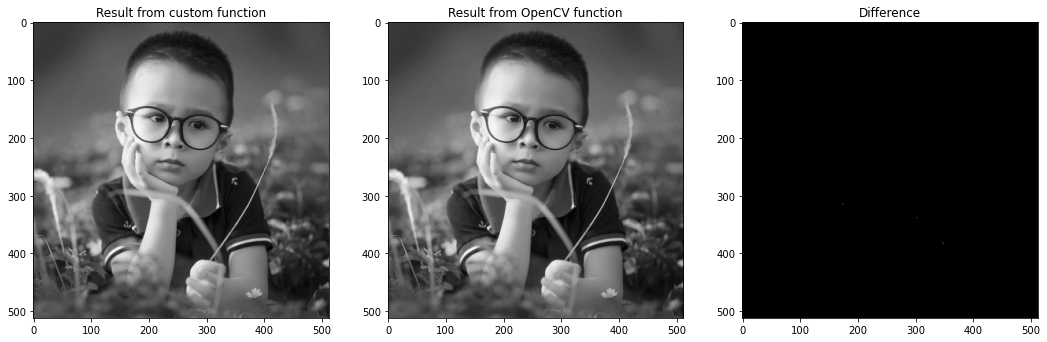

In [9]:
plt.figure(figsize=(18,12))
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(gray,cmap="gray")
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(gray_cv,cmap="gray")
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(gray-gray_cv),cmap="gray")
plt.show()

In [74]:
def convertBGRtoHSV(image):
    ###
    ### YOUR CODE HERE
    ###
    B, G, R = cv2.split(image)
    
    B = B / 255.0
    G = G / 255.0
    R = R / 255.0
    logger.info(B.dtype)
    
    tempMin = cv2.min(B, G)
    Cmin = cv2.min(tempMin, R) # Cmin = np.amin(image, axis=2)
    
    tempMax = cv2.max(B, G)
    Cmax = cv2.max(tempMax, R) # Cmax = np.amax(image, axis=2)
    
    # Value channel
    # V = np.amax(image, axis=2)
    V = Cmax
    
    delta = cv2.subtract(Cmax, Cmin)
    
    # Saturation channel
    S = np.zeros_like(V)
    
    # Method 1
#     tempS = np.divide(delta , V, where = V != 0)
    S = np.divide(delta, V, where = V != 0)
#     S[V != 0] = tempS[V != 0]

    # Method 2
#     S[V != 0] = (V[V != 0] - Cmin[V != 0]) / V[V != 0]
    
    # Method 3
#     S = np.where(V != 0, delta/V, 0)
#     S[V == 0] = 0

    
    # Hue Channel
    H = np.zeros_like(V)

    H = np.where(V == R, np.divide(60 * cv2.subtract(G, B), delta, where = delta !=0), H)
    H = np.where(V == G, np.add(120, np.divide(60 * cv2.subtract(B, R), delta, where = delta !=0)), H)
    H = np.where(V == B, np.add(240, np.divide(60 * cv2.subtract(R, G), delta, where = delta !=0)), H)
    
    H[H < 0] += 360
    H[delta == 0] = 0
    
    # Final conversion
    V = np.round(255.0 * V)
    
    logger.info(np.max(S))
    logger.info(np.min(S))
    logger.info(S.dtype)
    
    S = np.round(255.0 * S)
    
    logger.info(np.max(S))
    logger.info(np.min(S))
    logger.info(S.dtype)
    
    H = np.round( H * 0.5)
    
    hsvImage = cv2.merge([H, S, V])
    hsvImage = hsvImage.astype(int)
    
    logger.info(hsvImage.dtype)
    logger.info(hsvImage.shape)

    return hsvImage

In [75]:
hsv = convertBGRtoHSV(img)

2020-07-31 15:31:26,590 - Logging - INFO - float64
2020-07-31 15:31:26,649 - Logging - INFO - 1.0
2020-07-31 15:31:26,652 - Logging - INFO - 0.0
2020-07-31 15:31:26,653 - Logging - INFO - float64
2020-07-31 15:31:26,676 - Logging - INFO - 255.0
2020-07-31 15:31:26,678 - Logging - INFO - 0.0
2020-07-31 15:31:26,679 - Logging - INFO - float64
2020-07-31 15:31:26,708 - Logging - INFO - int32
2020-07-31 15:31:26,708 - Logging - INFO - (512, 512, 3)


In [76]:
hsv_cv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
logger.info(hsv_cv.dtype)

2020-07-31 15:31:26,745 - Logging - INFO - uint8


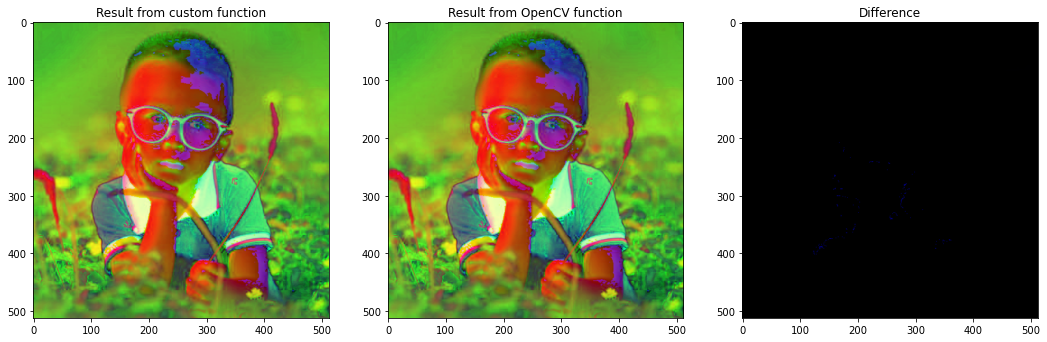

In [77]:
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(hsv[:,:,::-1])
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(hsv_cv[:,:,::-1])
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(hsv-hsv_cv)[:,:,::-1])
plt.show()

In [78]:
h1, s1, v1 = cv2.split(hsv)
h2, s2, v2 = cv2.split(hsv_cv)

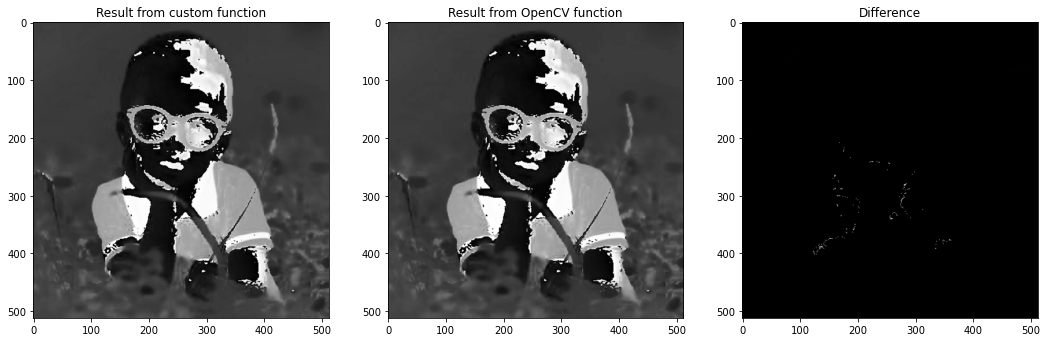

In [79]:
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(h1, cmap = 'gray')
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(h2, cmap = 'gray')
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(h1-h2), cmap = 'gray')
plt.show()

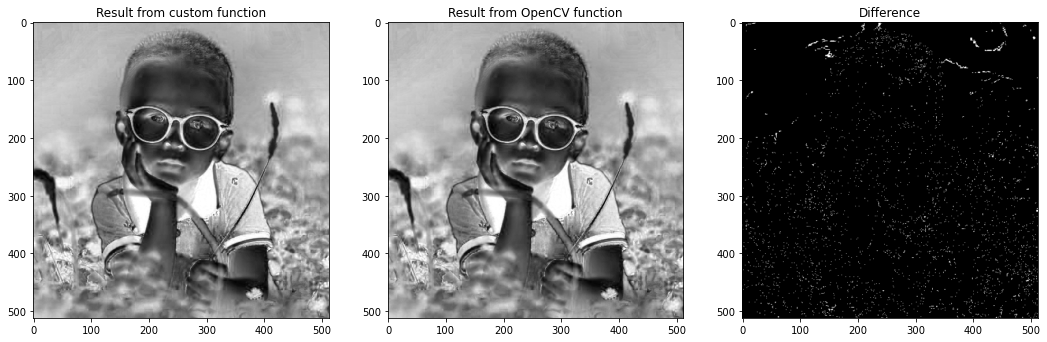

2020-07-31 15:31:28,660 - Logging - INFO - int32
2020-07-31 15:31:28,663 - Logging - INFO - [1 1 1 ... 1 1 1]
2020-07-31 15:31:28,666 - Logging - INFO - (array([  0,   0,   0, ..., 511, 511, 511], dtype=int64), array([ 20,  21,  22, ..., 440, 485, 499], dtype=int64))
2020-07-31 15:31:28,668 - Logging - INFO - 4027
2020-07-31 15:31:28,669 - Logging - INFO - 0


In [80]:
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(s1, cmap = 'gray')
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(s2, cmap = 'gray')
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(s1-s2), cmap = 'gray')
plt.show()

diffS = np.abs(s1-s2)
logger.info(diffS.dtype)
logger.info(diffS[diffS != 0])
logger.info(np.where(diffS !=0))
logger.info(np.count_nonzero(diffS != 0))
logger.info(np.min(diffS))

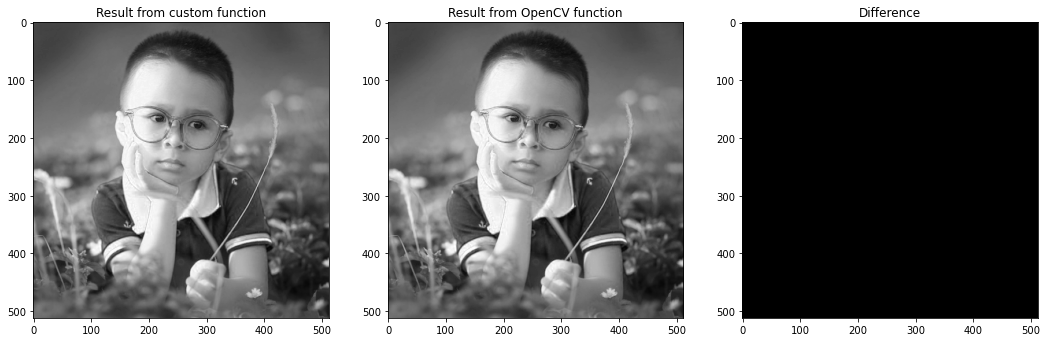

In [81]:
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(v1, cmap = 'gray')
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(v2, cmap = 'gray')
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(v1-v2), cmap = 'gray')
plt.show()